In [5]:
pip install pandas numpy scikit-learn scipy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\work\ides\python\311\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
import matplotlib.ticker as ticker
from scipy.cluster.hierarchy import dendrogram



In [7]:
# Função para processar valores escritos como 'milhões', 'bilhões' etc.
def convert_to_float(value):
    value = value.strip()  # Remove espaços em branco
    if 'bilhão' in value or 'bilhões' in value:
        return float(value.split()[0].replace(',', '.')) * 1e9
    elif 'milhão' in value or 'milhões' in value:
        return float(value.split()[0].replace(',', '.')) * 1e6
    else:
        # Tentar converter diretamente para float
        try:
            return float(value.replace(',', '.'))
        except ValueError:
            return np.nan  # Substitui valores inválidos por NaN

In [8]:
def prepare_country_data(file_path):
    # Carregar os dados
    df = pd.read_excel(file_path)

    # Diagnóstico inicial de valores ausentes
    print("Diagnóstico inicial de valores ausentes:")
    print(df.isnull().sum())

    # Limpeza e preparação dos dados (manter NaNs ao invés de remover linhas)
    df['Área Total (km)'] = (
        df['Área Total (km)']
        .astype(str)
        .str.replace(' km²', '', regex=False)
        .str.replace('.', '', regex=False)
        .str.strip()
        .replace('', np.nan)  # Substituir strings vazias por NaN
        .astype(float)
    )
    df['PIB Total (em dollar)'] = (
        df['PIB Total (em dollar)']
        .astype(str)
        .apply(lambda x: convert_to_float(x.strip()) if isinstance(x, str) else np.nan)
    )
    df['PIB Per Capta (em dollar)'] = (
        df['PIB Per Capta (em dollar)']
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.strip()
        .replace('', np.nan)
        .astype(float)
    )
    df['IDH'] = (
        df['IDH']
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.strip()
        .replace('', np.nan)
        .astype(float)
    )

    # Nenhuma linha será removida nesta etapa
    print("\nTabela após limpeza inicial:")
    print(df.head())

    return df


In [9]:
def analyze_country_data(df):
    """
    Realiza a análise nos dados do DataFrame numérico e gera gráficos, incluindo um dendograma.

    Parâmetros:
    df (pd.DataFrame): DataFrame com colunas preparadas.

    

    Retorna:
    None: Exibe os gráficos e a tabela de correlação.
    """
    # Filtrar apenas colunas numéricas

    df.to_excel("dados_original.xlsx", index=True)
    print("DataFrame salvo como 'dados_original.xlsx'.")

    numeric_data = df.select_dtypes(include=[np.number])

    # Diagnóstico inicial
    if numeric_data.empty:
        print("Nenhuma coluna numérica disponível para análise.")
        return

    print("Dados numéricos para análise:")
    print(numeric_data.head())

    # Escalar os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    # PCA (Análise de Componentes Principais)
    pca = PCA()
    pca_data = pca.fit_transform(scaled_data)

    # Gráfico dos autovalores principais
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    plt.xlabel("Componentes Principais")
    plt.ylabel("Proporção da Variância Explicada")
    plt.title("Variância Explicada por Componente Principal")
    plt.show()

    # Matriz de correlação
    correlation_matrix = numeric_data.corr()

    print("Matriz de Correlação:")
    print(correlation_matrix)

    # Exibir correlações graficamente
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Mapa de Calor da Matriz de Correlação")
    plt.show()

    # Dendograma em alta resolução
    plt.figure(figsize=(20, 12))  # Dimensão aumentada
    linkage_matrix = sch.linkage(scaled_data, method='ward')
    dendrogram = sch.dendrogram(
        linkage_matrix,
        labels=df.index,
        leaf_rotation=90,
        leaf_font_size=10,
    )
    plt.title("Dendograma: Clusterização de Países")
    plt.xlabel("Países")
    plt.ylabel("Distância Euclidiana")

     # Adicionar espaçamento entre as linhas (leaf_font_size já ajusta o tamanho das folhas)
    plt.gca().tick_params(axis='x', which='both', labelsize=6, pad=2, ) # Espaço extra para rótulos

    # Recuperar o eixo atual
    ax = plt.gca()

# Modificar as linhas do dendograma
    for line in ax.get_lines():
       line.set_color('gray')  # Define a cor das linhas como cinza
       line.set_linewidth(0.5)  # Define a largura das linhas como fina
    

    # Salvar em formato PDF e SVG
    plt.savefig("dendograma_alta_resolucao.pdf", format="pdf", dpi=300, bbox_inches="tight")
    plt.savefig("dendograma_alta_resolucao.svg", format="svg", bbox_inches="tight")
    print("Dendograma salvo como 'dendograma_alta_resolucao.pdf' e 'dendograma_alta_resolucao.svg'.")
    plt.show()


In [10]:
file_path = r"C:\WORK\WORKSPACE\DATA ANALISIS\machine learning - correlation\paises_do_mundo_preenchida.xlsx"

In [11]:
df_numeric = prepare_country_data(file_path)

Diagnóstico inicial de valores ausentes:
País                                 0
Ano de Fundação ou Independência     0
Área Total (km)                      0
População                            0
PIB Total (em dollar)                0
PIB Per Capta (em dollar)            0
IDH                                  0
Ásia                                 0
América                              0
Europa                               0
África                               0
Oceania                              0
Cristão                              0
Islamica                             0
Hindu                                0
Outras                               0
Inglês                               0
Árabe                                0
Francês                              0
Espanhol                             0
Outras.1                             0
Monarquia Absoluta                   0
Monarquia Parlamentarista            0
República Presidencialista           0
República Parlamentaris

DataFrame salvo como 'dados_original.xlsx'.
Dados numéricos para análise:
   Ano de Fundação ou Independência   Área Total (km)  População  \
0                               1919        6520900.0   32225560   
1                               1910       12210370.0   60414000   
2                               1912         287480.0    2878000   
3                               1871        3570220.0   83190556   
4                               1278           4680.0      77281   

   PIB Total (em dollar)  PIB Per Capta (em dollar)    IDH  Ásia  América  \
0           2.170600e+10                      693.0  0.478     1        0   
1           9.974000e+11                    16211.0  0.713     0        0   
2           1.500000e+10                     5210.0  0.795     0        0   
3           4.743000e+12                    57530.0  0.942     0        0   
4           2.770000e+09                    35000.0  0.868     0        0   

   Europa  África  ...  Outras  Inglês  Árabe  Francês

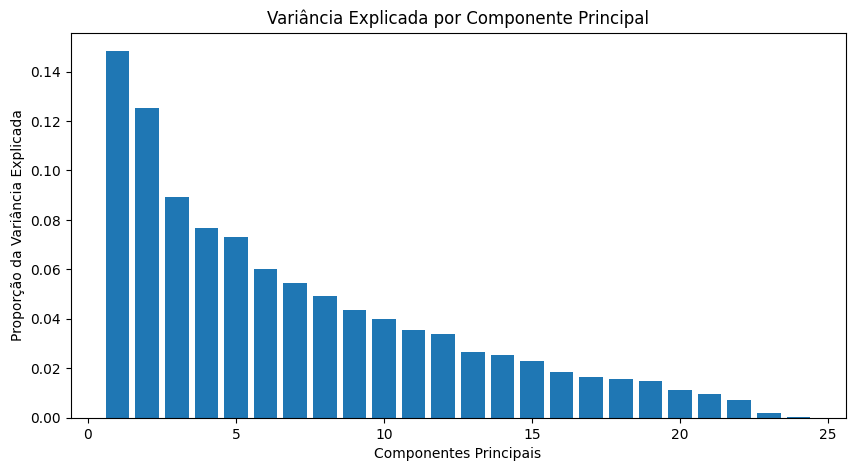

Matriz de Correlação:
                                   Ano de Fundação ou Independência   \
Ano de Fundação ou Independência                            1.000000   
Área Total (km)                                            -0.002417   
População                                                   0.004273   
PIB Total (em dollar)                                      -0.021295   
PIB Per Capta (em dollar)                                  -0.288400   
IDH                                                        -0.276648   
Ásia                                                        0.112788   
América                                                    -0.060932   
Europa                                                     -0.313064   
África                                                      0.187793   
Oceania                                                     0.091793   
Cristão                                                    -0.132292   
Islamica                                  

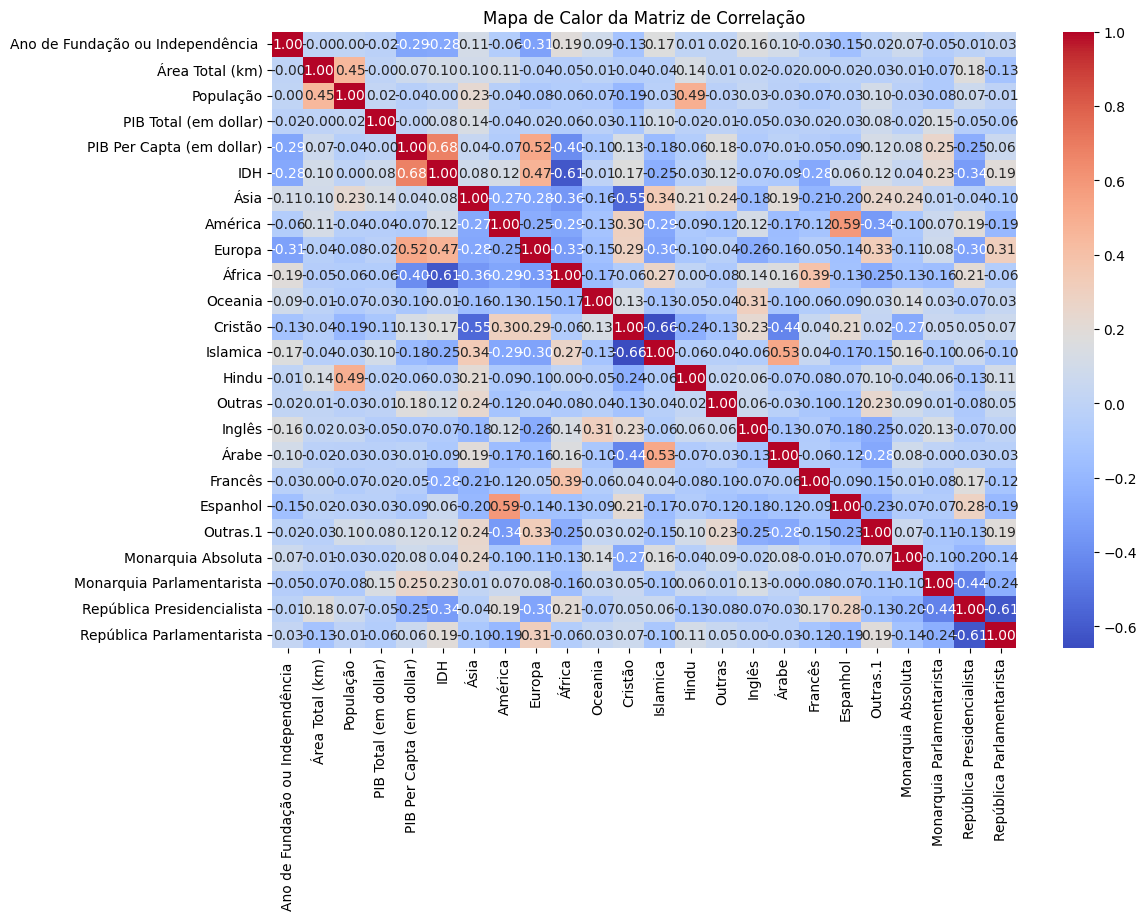

Dendograma salvo como 'dendograma_alta_resolucao.pdf' e 'dendograma_alta_resolucao.svg'.


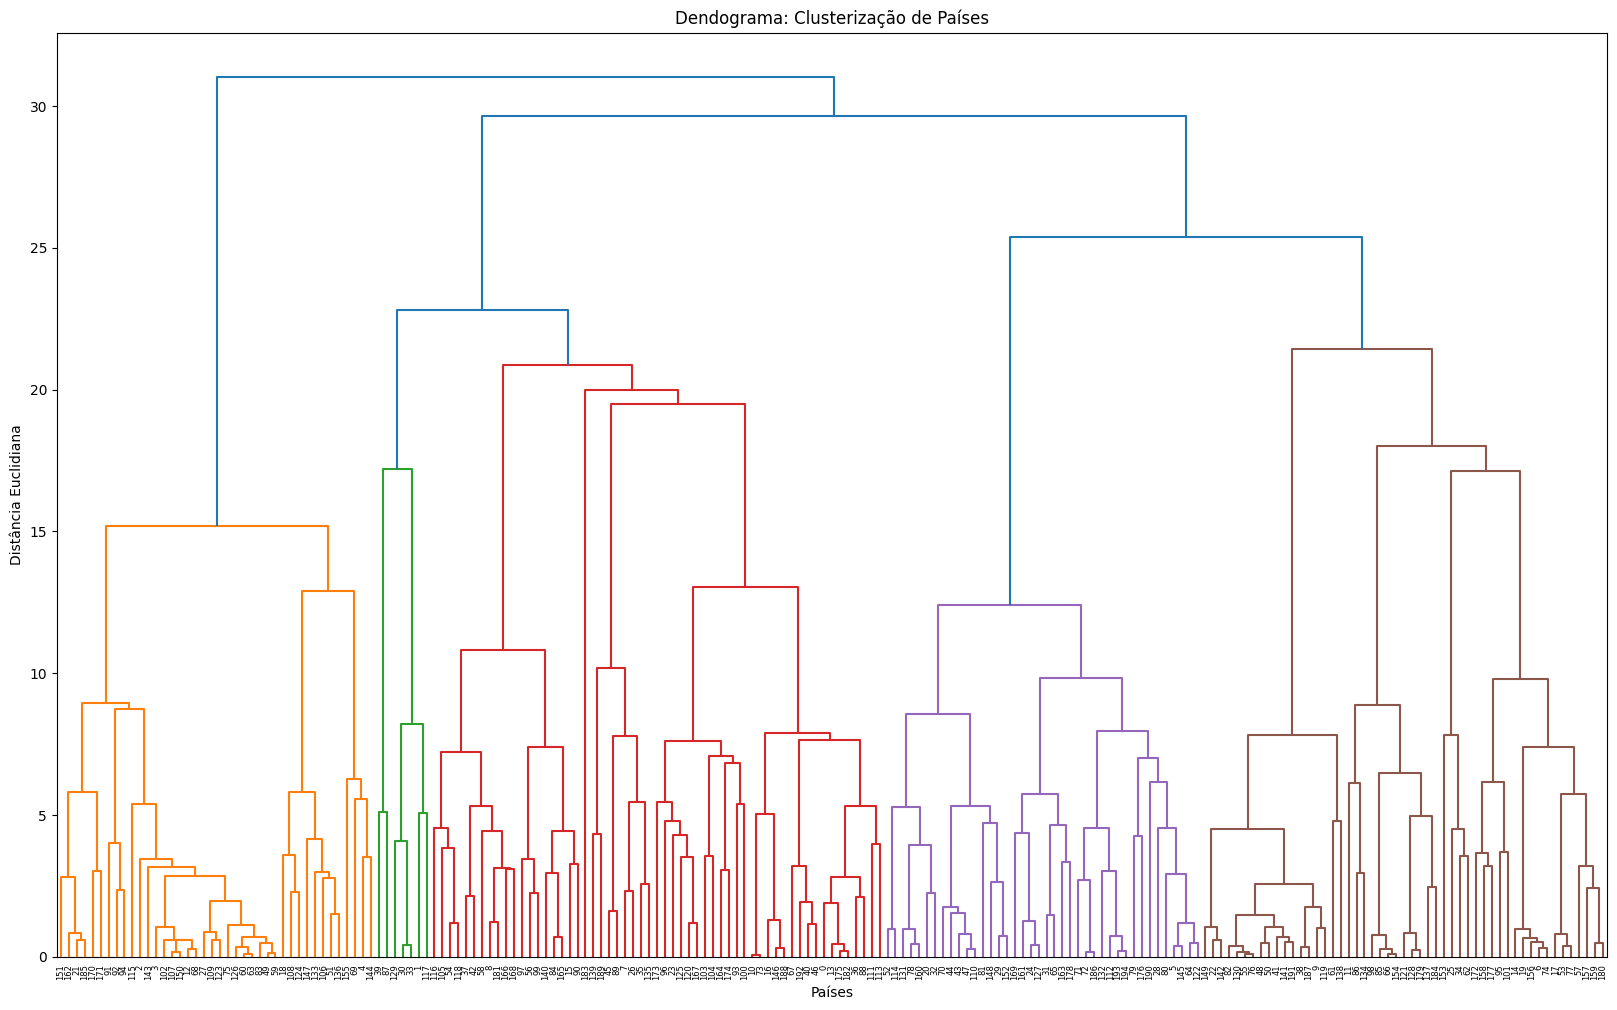

In [12]:
analyze_country_data(df_numeric)